In [1]:
# 1️⃣ Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse

In [2]:
# 2️⃣ Function to plot cluster + ellipse
def plot_cluster_ellipse(X, labels, title=""):
    plt.figure(figsize=(7,6))
    for label in np.unique(labels):
        points = X[labels == label]
        plt.scatter(points[:,0], points[:,1], label=f"Class {label}")
        
        # Compute mean and covariance for ellipse
        mean = np.mean(points, axis=0)
        cov = np.cov(points, rowvar=False)
        eigvals, eigvecs = np.linalg.eigh(cov)
        angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))
        
        # Width & height of ellipse = 2*sqrt(eigenvalues)
        ellipse = Ellipse(xy=mean, width=2*np.sqrt(eigvals[0])*2,
                          height=2*np.sqrt(eigvals[1])*2,
                          angle=angle, alpha=0.2)
        plt.gca().add_patch(ellipse)

    # FIX AXIS RANGE HERE
    plt.xlim(-35, 35)
    plt.ylim(-35, 35)

    plt.xlabel("X1"); plt.ylabel("X2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()    

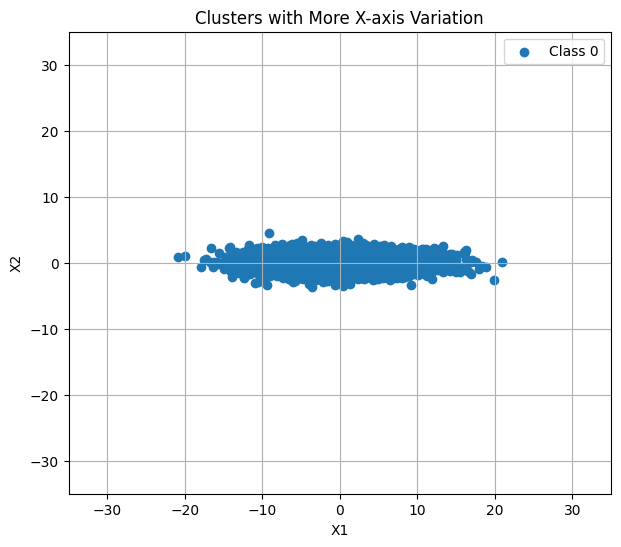

shape:
 (5000, 2)
mean:
 [-0.10544176  0.01371778]
cov:
 [[3.00794314e+01 1.82685272e-03]
 [1.82685272e-03 1.01499712e+00]]


In [3]:
# More variation on x-axis only
center = [0,0]
cov = [[30,0],
        [0,1]]
# Manually adjust covariance
X_custom = np.vstack([
    np.random.multivariate_normal(center, cov, 5000)])
y_custom = np.array([0]*5000)

plot_cluster_ellipse(X_custom, y_custom, title="Clusters with More X-axis Variation")

# print(X_custom)
print("shape:\n",X_custom.shape)
print("mean:\n",np.mean(X_custom,axis=0))
print("cov:\n",np.cov(X_custom.T))


In [4]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print("shape:\n",X.shape)
print("mean:\n",np.mean(X,axis=0))
print("cov:\n",np.cov(X.T))


shape:
 (150, 4)
mean:
 [5.84333333 3.05733333 3.758      1.19933333]
cov:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


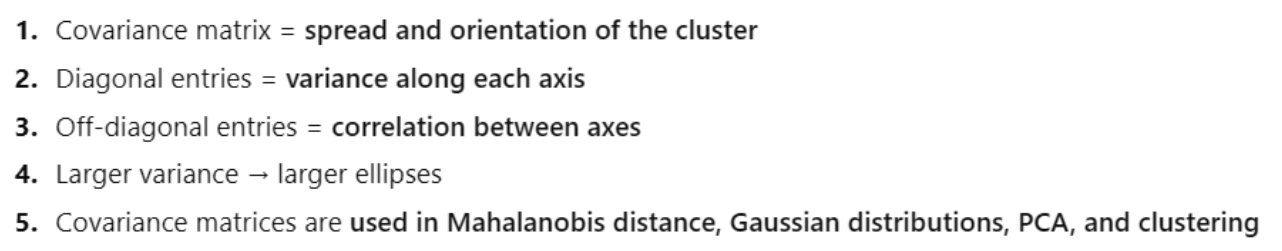

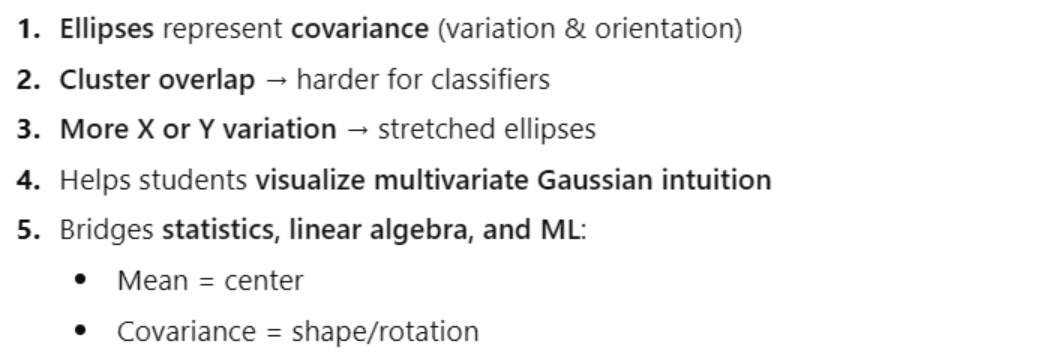

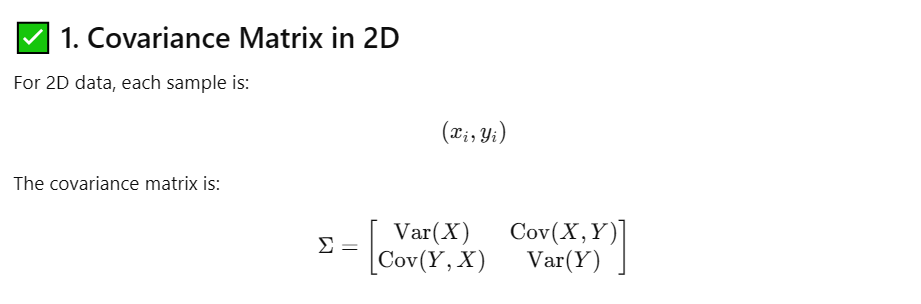

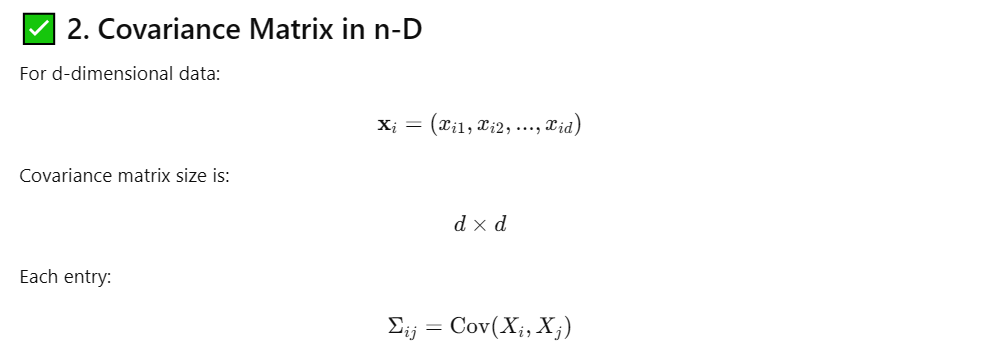

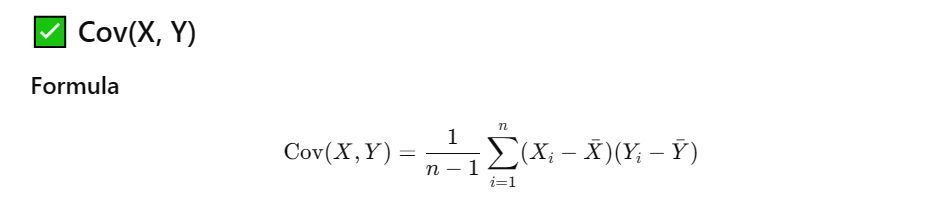

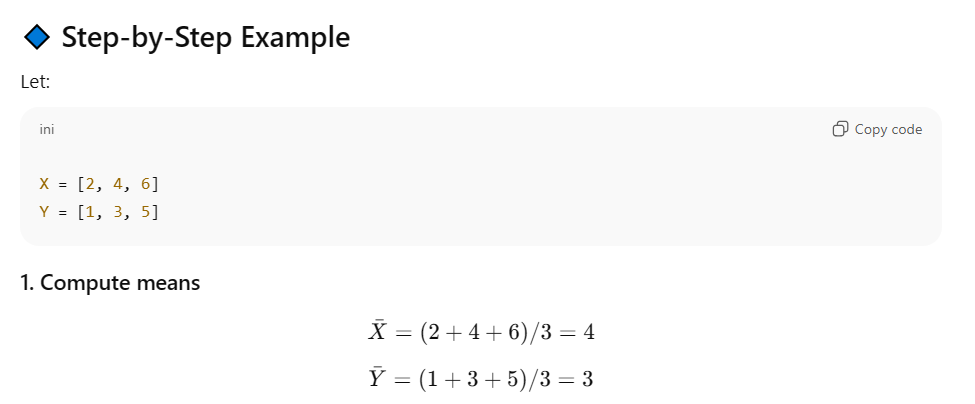

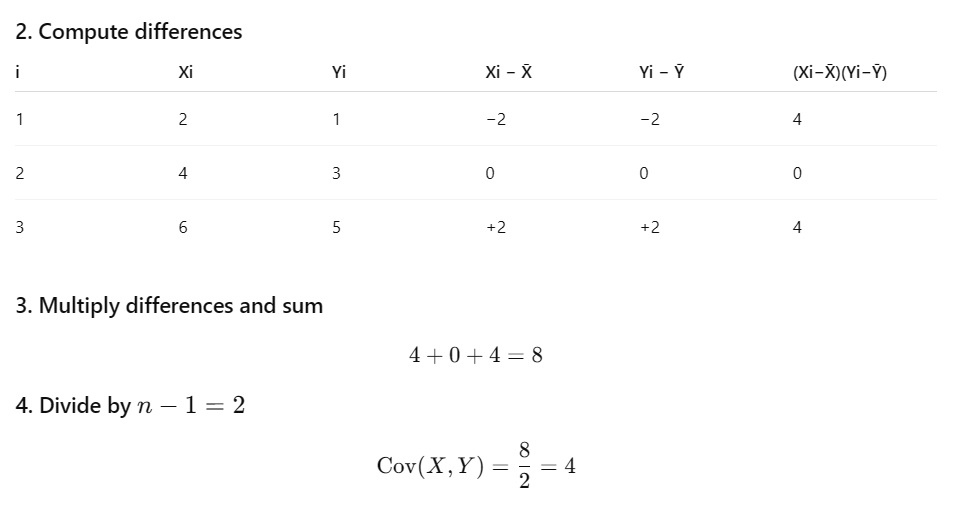

In [5]:
import numpy as np

X = np.array([2,4,6,8])
Y = np.array([1,3,5,7])

cov_n   = np.sum((X-X.mean())*(Y-Y.mean())) / len(X)      # divide by n
cov_n1  = np.sum((X-X.mean())*(Y-Y.mean())) / (len(X)-1)  # divide by n-1

print("Cov using n:   ", cov_n)
print("Cov using n-1: ", cov_n1)

Cov using n:    5.0
Cov using n-1:  6.666666666666667


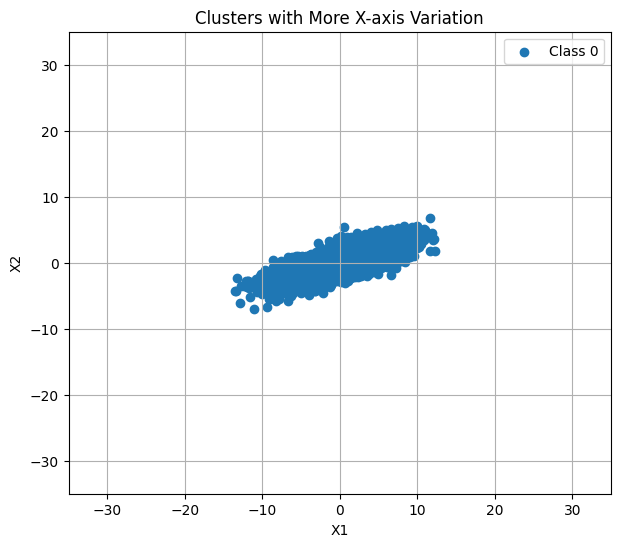

shape:
 (5000, 2)
mean:
 [0.04996507 0.03511469]
cov:
 [[15.51427108  5.30616272]
 [ 5.30616272  3.14553043]]


In [6]:
# More variation on x-axis only
center = [0,0]

_c = 5
cov = [[15,_c],
       [_c,3]]
# Manually adjust covariance
X_custom = np.vstack([
    np.random.multivariate_normal(center, cov, 5000)])
y_custom = np.array([0]*5000)

plot_cluster_ellipse(X_custom, y_custom, title="Clusters with More X-axis Variation")

# print(X_custom)
print("shape:\n",X_custom.shape)
print("mean:\n",np.mean(X_custom,axis=0))
print("cov:\n",np.cov(X_custom.T))


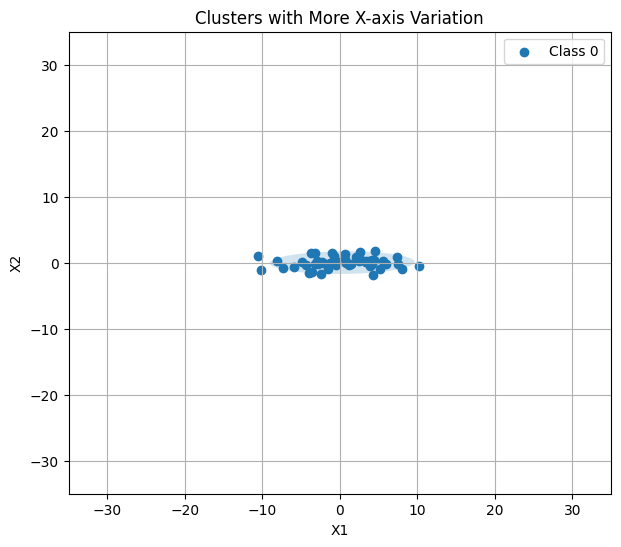

shape:
 (50, 2)
mean:
 [0.31466617 0.01733387]
cov:
 [[21.86731916  0.22367139]
 [ 0.22367139  0.74108891]]


In [7]:
# More variation on x-axis only
center = [0,0]

_c = 0
cov = [[15,_c],
       [_c,1]]
# Manually adjust covariance
X_custom = np.vstack([
    np.random.multivariate_normal(center, cov, 50)])
y_custom = np.array([0]*50)

plot_cluster_ellipse(X_custom, y_custom, title="Clusters with More X-axis Variation")

# print(X_custom)
print("shape:\n",X_custom.shape)
print("mean:\n",np.mean(X_custom,axis=0))
print("cov:\n",np.cov(X_custom.T))


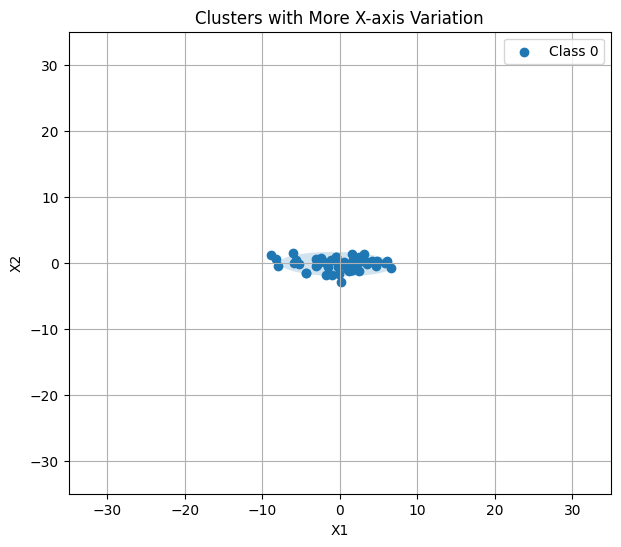

In [8]:
# More variation on x-axis only
center = [0,0]

_c = 0
cov = [[15,_c],
       [_c,1]]
# Manually adjust covariance
X_custom = np.vstack([
    np.random.multivariate_normal(center, cov, 50)])
y_custom = np.array([0]*50)

plot_cluster_ellipse(X_custom, y_custom, title="Clusters with More X-axis Variation")

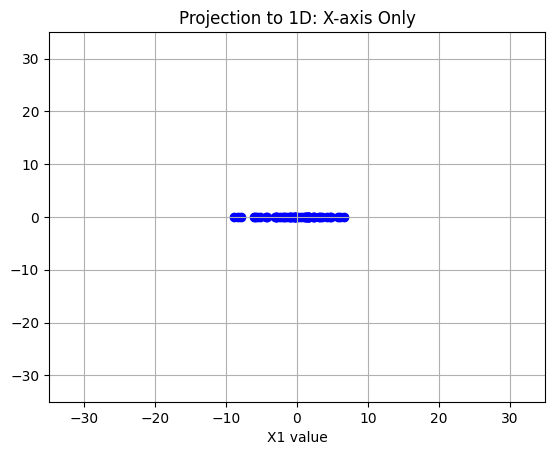

In [9]:
# 1️⃣ Project points onto X-axis (use only X1)

X1 = X_custom[:, 0]     # take first dimension
zeros = np.zeros_like(X1)
plt.scatter(X1, zeros, color='blue')

plt.title("Projection to 1D: X-axis Only")
plt.xlabel("X1 value")
# plt.yticks([])  # hide y-axis

plt.grid(True)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.show()


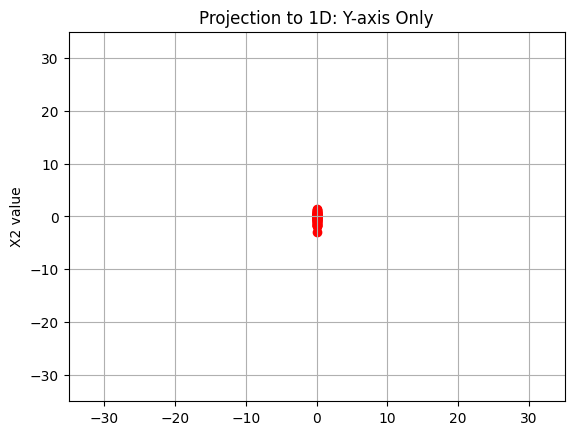

In [10]:
# 2️⃣ Project points onto Y-axis (use only X2)

X2 = X_custom[:, 1]     # take second dimension
zeros = np.zeros_like(X2)
plt.scatter(zeros, X2, color='red')

plt.title("Projection to 1D: Y-axis Only")
plt.ylabel("X2 value")
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.grid(True)
plt.show()


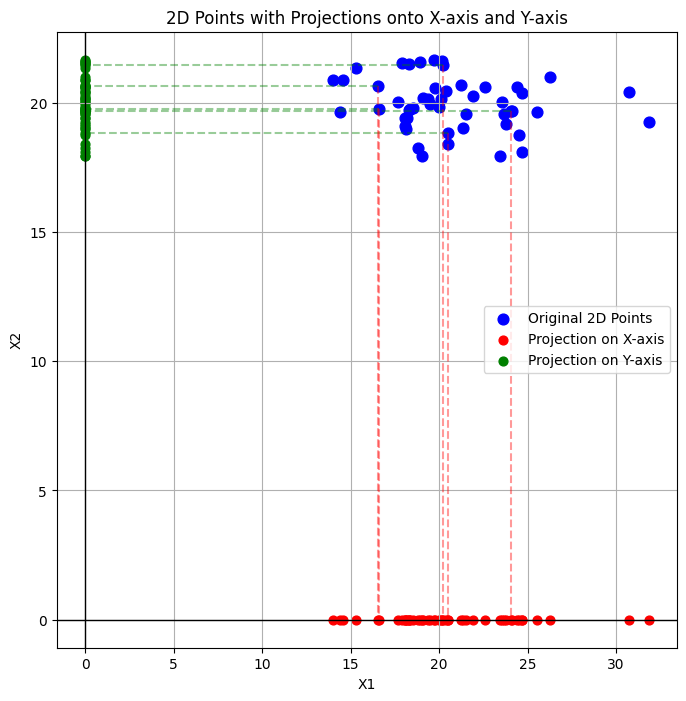

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Data (same as your example)
# ------------------------------
center = [20,20]
_c = 0
cov = [[15, _c],
       [_c, 1]]

X_custom = np.random.multivariate_normal(center, cov, 50)

X1 = X_custom[:,0]
X2 = X_custom[:,1]

# ------------------------------
# Combined plot
# ------------------------------
plt.figure(figsize=(8,8))

# 1: Original 2D points
plt.scatter(X1, X2, color='blue', s=60, label="Original 2D Points")

# 2: Projection on X-axis (Y=0)
plt.scatter(X1, np.zeros_like(X1), color='red', s=40, label="Projection on X-axis")

# 3: Projection on Y-axis (X=0)
plt.scatter(np.zeros_like(X2), X2, color='green', s=40, label="Projection on Y-axis")

# ------------------------------
# Dashed projection lines
# ------------------------------

for x, y in X_custom:
    if np.random.rand()>0.9:
        # Line from 2D point → X-axis projection
        plt.plot([x, x], [y, 0], color='red', linestyle='--', alpha=0.4)
        
        # Line from 2D point → Y-axis projection
        plt.plot([x, 0], [y, y], color='green', linestyle='--', alpha=0.4)

# ------------------------------
# Formatting
# ------------------------------
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.title("2D Points with Projections onto X-axis and Y-axis")
plt.xlabel("X1")
plt.ylabel("X2")

plt.grid(True)
plt.legend()
plt.show()


C:\Users\viroo\AppData\Local\Temp\ipykernel_11056\1381835583.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X_custom = np.random.multivariate_normal(center, cov, 50)


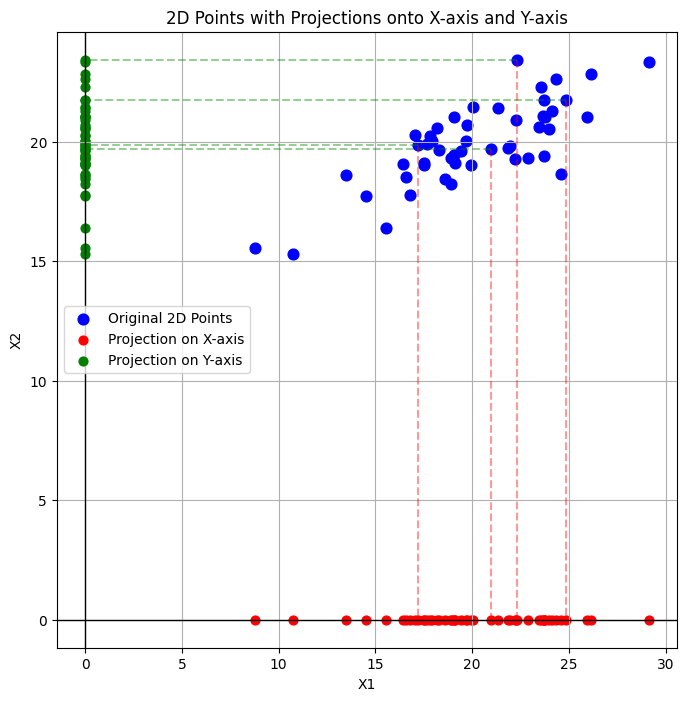

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Data (same as your example)
# ------------------------------
center = [20,20]
_c = 6
cov = [[15, _c],
       [_c, 1]]

X_custom = np.random.multivariate_normal(center, cov, 50)

X1 = X_custom[:,0]
X2 = X_custom[:,1]

# ------------------------------
# Combined plot
# ------------------------------
plt.figure(figsize=(8,8))

# 1: Original 2D points
plt.scatter(X1, X2, color='blue', s=60, label="Original 2D Points")

# 2: Projection on X-axis (Y=0)
plt.scatter(X1, np.zeros_like(X1), color='red', s=40, label="Projection on X-axis")

# 3: Projection on Y-axis (X=0)
plt.scatter(np.zeros_like(X2), X2, color='green', s=40, label="Projection on Y-axis")

# ------------------------------
# Dashed projection lines
# ------------------------------

for x, y in X_custom:
    if np.random.rand()>0.9:
        # Line from 2D point → X-axis projection
        plt.plot([x, x], [y, 0], color='red', linestyle='--', alpha=0.4)
        
        # Line from 2D point → Y-axis projection
        plt.plot([x, 0], [y, y], color='green', linestyle='--', alpha=0.4)

# ------------------------------
# Formatting
# ------------------------------
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.title("2D Points with Projections onto X-axis and Y-axis")
plt.xlabel("X1")
plt.ylabel("X2")

plt.grid(True)
plt.legend()
plt.show()


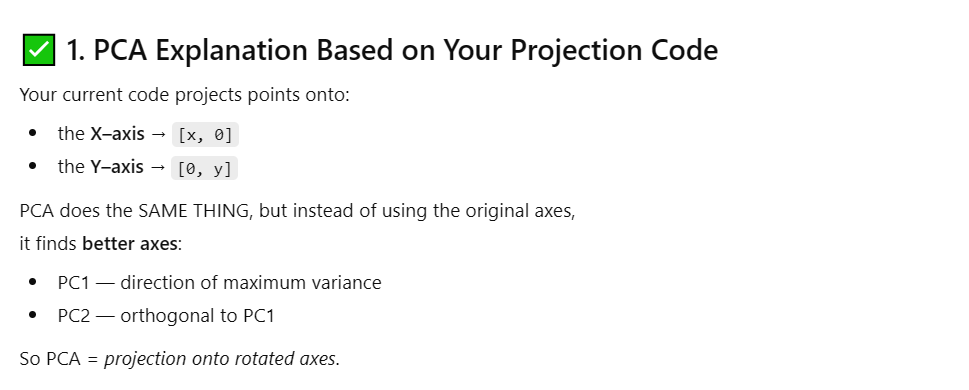

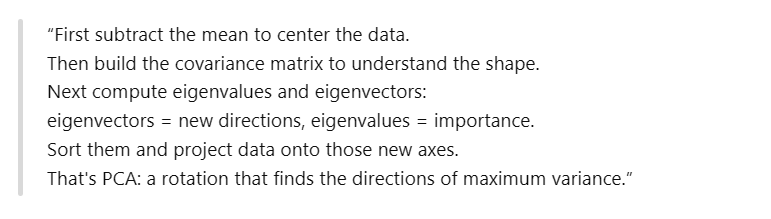

Covariance Matrix:
 [[16.63308078  5.55179575]
 [ 5.55179575  3.20041989]]
Eigenvalues: [18.63062036  1.20288031]
Eigenvectors (PC1, PC2):
 [[-0.94094719  0.33855338]
 [-0.33855338 -0.94094719]]


C:\Users\viroo\AppData\Local\Temp\ipykernel_11056\2185920001.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X_custom = np.random.multivariate_normal(center, cov, 50)


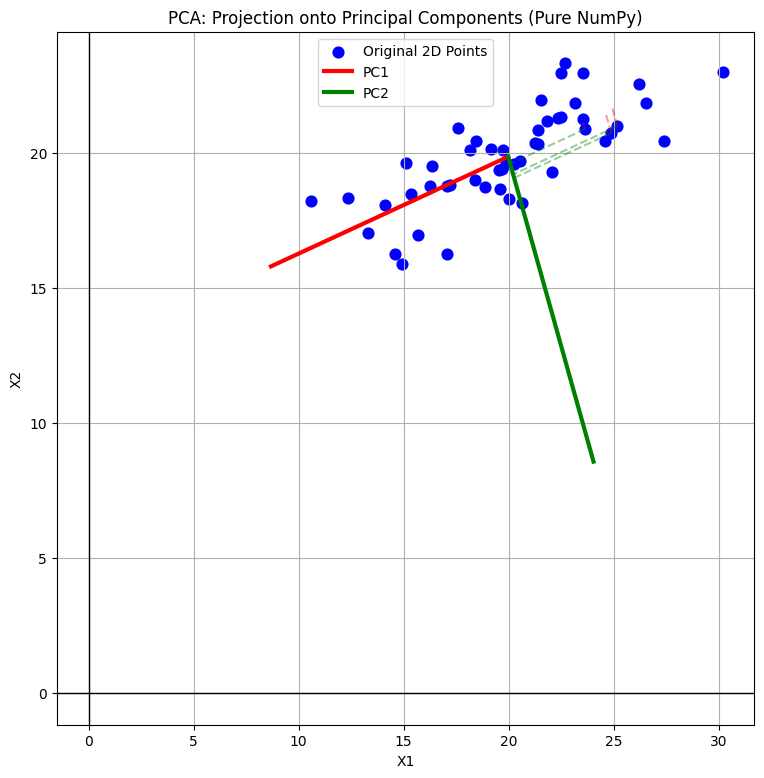

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Data (EXACT SAME AS YOUR CODE)
# ------------------------------
center = [20,20]
_c = 6
cov = [[15, _c],
       [_c, 1]]

np.random.seed(0)
X_custom = np.random.multivariate_normal(center, cov, 50)

X1 = X_custom[:,0]
X2 = X_custom[:,1]

# ------------------------------
# STEP 1 — Compute PCA from scratch
# ------------------------------

# Center the data
X_centered = X_custom - np.mean(X_custom, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_centered.T)

# Eigen-decomposition
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Sort eigenvalues (largest first)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

PC1 = eigvecs[:,0]   # major direction
PC2 = eigvecs[:,1]   # minor direction

print("Covariance Matrix:\n", cov_matrix)
print("Eigenvalues:", eigvals)
print("Eigenvectors (PC1, PC2):\n", eigvecs)

# ------------------------------
# STEP 2 — Project onto PC1 and PC2 (PCA coordinates)
# ------------------------------
X_pca = X_centered @ eigvecs   # shape (50,2)
PC1_proj = X_pca[:,0]
PC2_proj = X_pca[:,1]

# ------------------------------
# STEP 3 — Plot data + PCA axes + PCA projections
# ------------------------------
plt.figure(figsize=(9,9))

# 1. Original data
plt.scatter(X1, X2, color='blue', s=60, label="Original 2D Points")

# 2. PCA axes (draw lines from the mean)
mean = np.mean(X_custom, axis=0)

scale = 12  # length of axes
pc1_line = mean + PC1 * scale
pc2_line = mean + PC2 * scale

plt.plot([mean[0], pc1_line[0]], [mean[1], pc1_line[1]], color='red', linewidth=3, label="PC1")
plt.plot([mean[0], pc2_line[0]], [mean[1], pc2_line[1]], color='green', linewidth=3, label="PC2")

# 3. Projection dashed lines — EXACT SAME LOGIC as your original code
for i in range(50):
    if np.random.rand() > 0.9:
        # original point
        x, y = X_custom[i]
        # projection onto PC1 line
        proj_pc1 = mean + PC1 * PC1_proj[i]
        proj_pc2 = mean + PC2 * PC2_proj[i]

        # projection lines
        plt.plot([x, proj_pc1[0]], [y, proj_pc1[1]], 'r--', alpha=0.4)
        plt.plot([x, proj_pc2[0]], [y, proj_pc2[1]], 'g--', alpha=0.4)

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.title("PCA: Projection onto Principal Components (Pure NumPy)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()


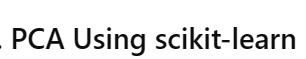

In [14]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
X_pca_lib = pca.fit_transform(X_custom)

print("PCA components (eigenvectors):\n", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Explained variance ratio:", pca.explained_variance_ratio_)


PCA components (eigenvectors):
 [[ 0.94094719  0.33855338]
 [-0.33855338  0.94094719]]
Explained variance: [18.63062036  1.20288031]
Explained variance ratio: [0.93935108 0.06064892]


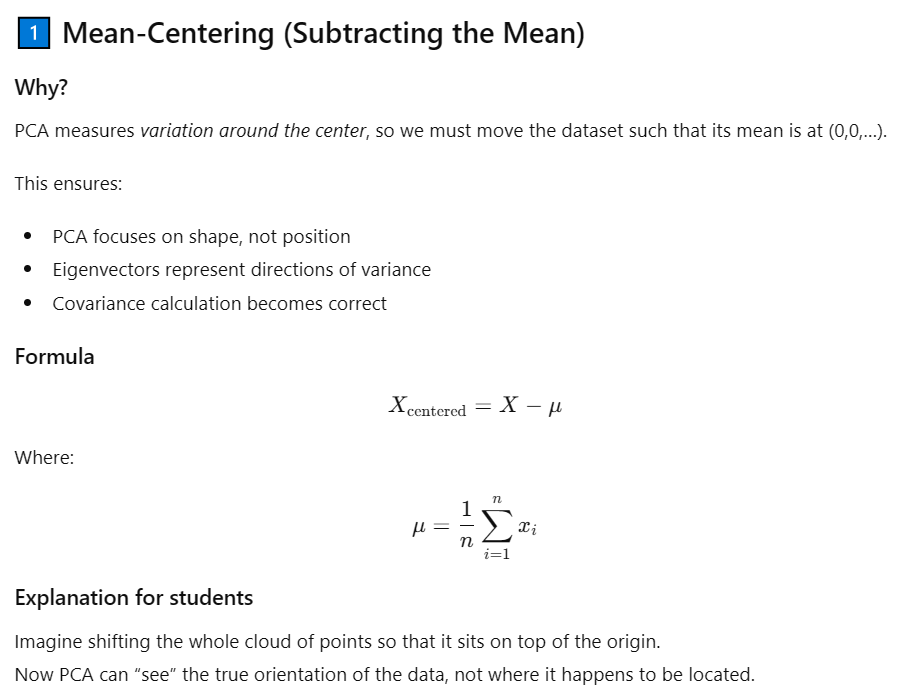

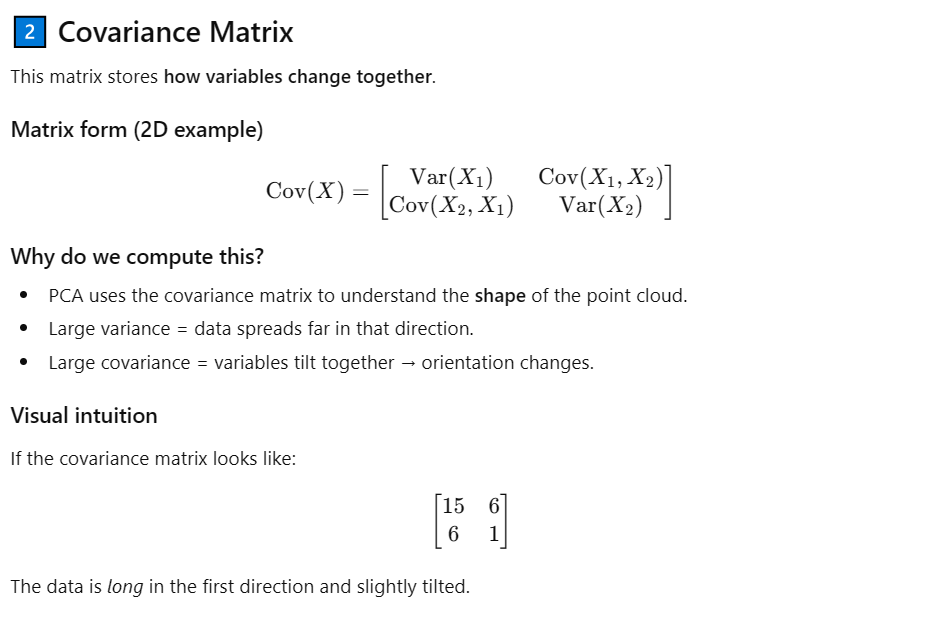

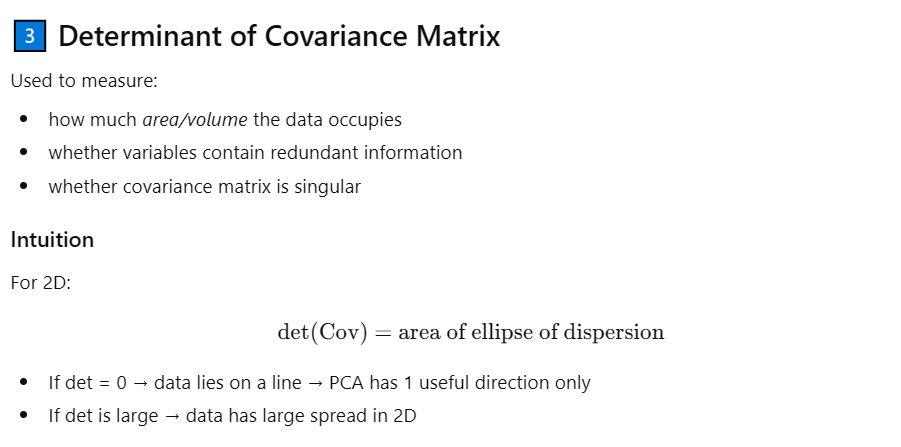

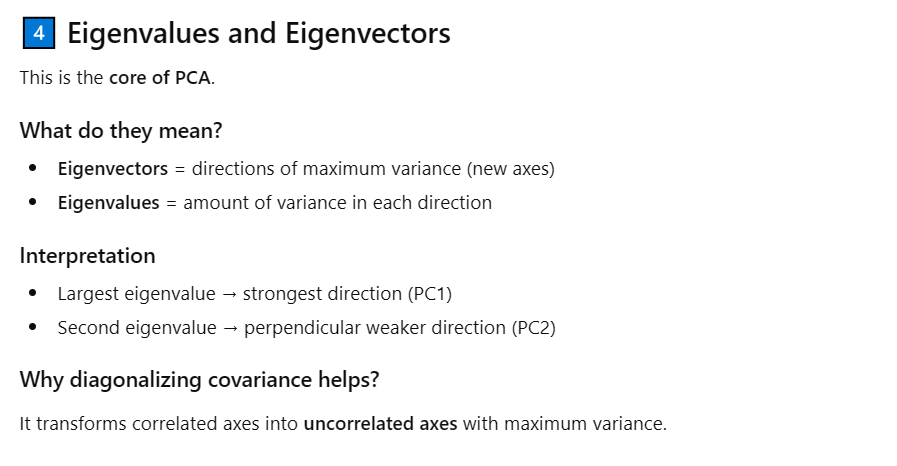

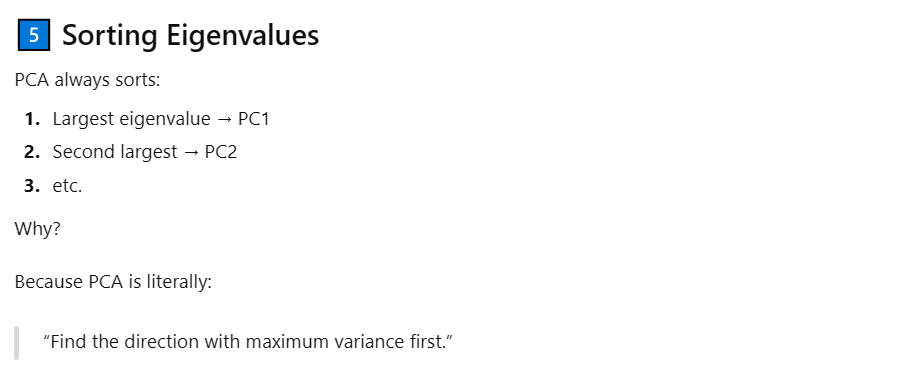

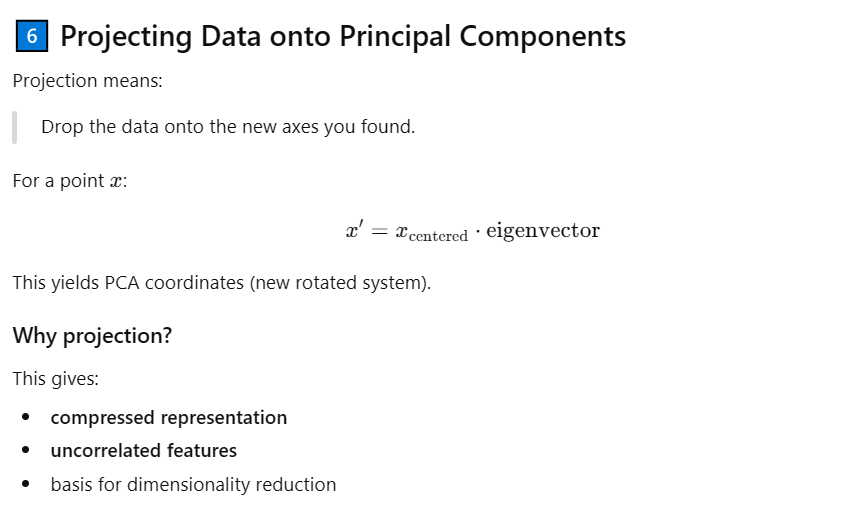

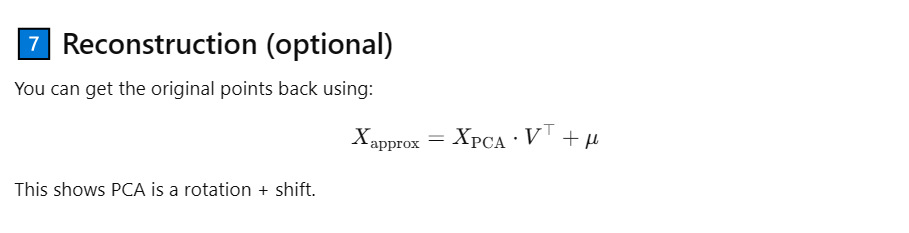

In [15]:
import numpy as np

# ---------- STEP 0: Your dataset ----------
center = [20,20]
_c = 6
cov = [[15, _c], [_c, 1]]

np.random.seed(0)
X = np.random.multivariate_normal(center, cov, 50)

# ---------- STEP 1: Mean Center ----------
mean = np.mean(X, axis=0)
X_centered = X - mean

print("Mean:\n", mean)

# ---------- STEP 2: Covariance Matrix ----------
cov_matrix = np.cov(X_centered.T)
print("Covariance Matrix:\n", cov_matrix)

# ---------- STEP 3: Determinant ----------
det = np.linalg.det(cov_matrix)
print("Determinant of Cov:", det)

# ---------- STEP 4: Eigen decomposition ----------
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

# ---------- STEP 5: Sort (descending) ----------
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Sorted Eigenvalues:", eigvals)
print("PC1:", eigvecs[:,0])
print("PC2:", eigvecs[:,1])

# ---------- STEP 6: Projection ----------
X_pca = X_centered @ eigvecs    ### np.matmul() or .dot()
print("PCA Coordinates (first 5):\n", X_pca[:5])


Mean:
 [19.97398317 19.86932039]
Covariance Matrix:
 [[16.63308078  5.55179575]
 [ 5.55179575  3.20041989]]
Determinant of Cov: 22.410406432385674
Eigenvalues: [ 1.20288031 18.63062036]
Eigenvectors:
 [[ 0.33855338 -0.94094719]
 [-0.94094719 -0.33855338]]
Sorted Eigenvalues: [18.63062036  1.20288031]
PC1: [-0.94094719 -0.33855338]
PC2: [ 0.33855338 -0.94094719]
PCA Coordinates (first 5):
 [[ 7.24722646  0.39313159]
 [ 3.97042082  2.39671647]
 [ 7.6903107  -1.12411317]
 [ 3.87514207 -0.24607379]
 [-0.50107785  0.33543696]]


C:\Users\viroo\AppData\Local\Temp\ipykernel_11056\3635040362.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(center, cov, 50)


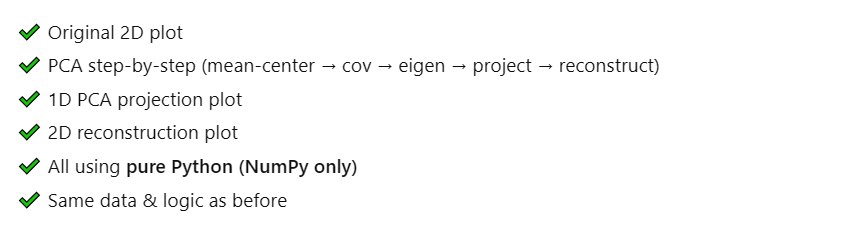

C:\Users\viroo\AppData\Local\Temp\ipykernel_11056\2743049084.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(center, cov, 80)


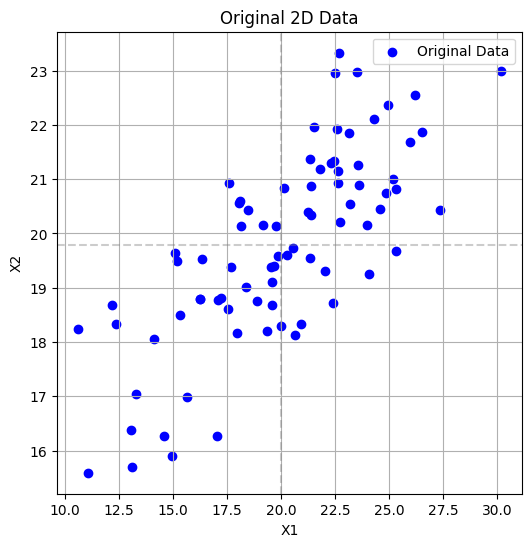

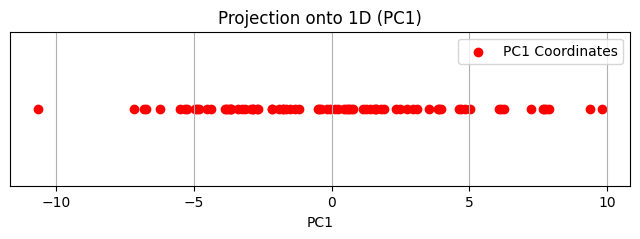

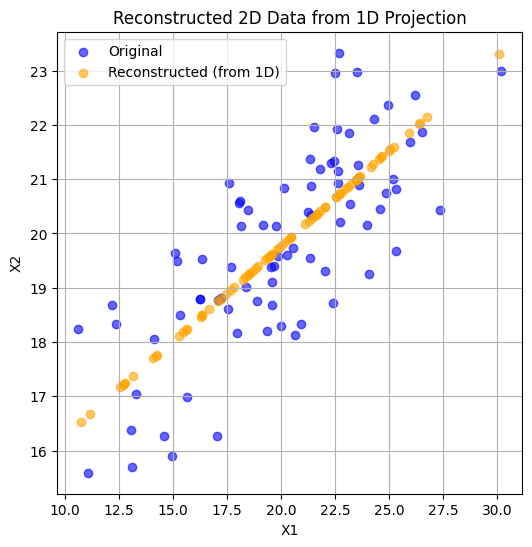

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1) Generate Data
# --------------------------
center = [20, 20]
_c = 6
cov = [[15, _c],
       [_c, 1]]

np.random.seed(0)
X = np.random.multivariate_normal(center, cov, 80)

# --------------------------
# 2) Mean-Center the Data
# --------------------------
mean = np.mean(X, axis=0)
X_centered = X - mean

# --------------------------
# 3) Covariance Matrix
# --------------------------
cov_matrix = np.cov(X_centered.T)

# --------------------------
# 4) Eigen Decomposition
# --------------------------
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Sort eigenvalues (largest first)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# --------------------------
# 5) Project Data into PCA Space
# --------------------------
X_pca = X_centered @ eigvecs

# Project onto only PC1 → 1D
X_pca_1d = X_pca[:, [0]]

# --------------------------
# 6) Reconstruct from 1D
# --------------------------
X_reconstructed = X_pca_1d @ eigvecs[:, [0]].T + mean

# ============================================================
# PLOTS
# ============================================================

# --------------------------
# Plot A: Original 2D Data
# --------------------------
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c='blue', label="Original Data")
plt.axhline(mean[1], color='gray', linestyle='--', alpha=0.4)
plt.axvline(mean[0], color='gray', linestyle='--', alpha=0.4)
plt.title("Original 2D Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()

# --------------------------
# Plot B: 1D PCA Projection
# --------------------------
plt.figure(figsize=(8,2))
plt.scatter(X_pca_1d[:,0], np.zeros_like(X_pca_1d[:,0]),
            c='red', label="PC1 Coordinates")
plt.title("Projection onto 1D (PC1)")
plt.xlabel("PC1")
plt.yticks([])
plt.grid(True)
plt.legend()
plt.show()

# --------------------------
# Plot C: Reconstructed (from 1D) vs Original
# --------------------------
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c='blue', label="Original", alpha=0.6)
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],
            c='orange', label="Reconstructed (from 1D)", alpha=0.6)
plt.title("Reconstructed 2D Data from 1D Projection")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()


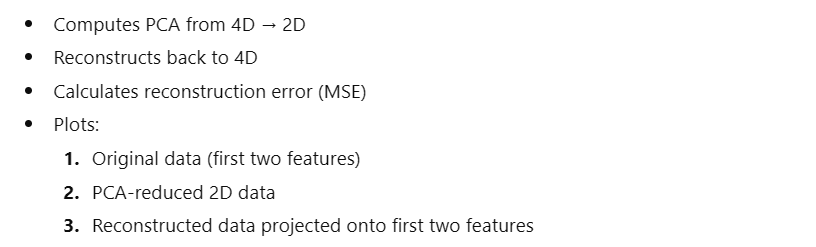

Reconstruction error (MSE): 0.025341073932398255


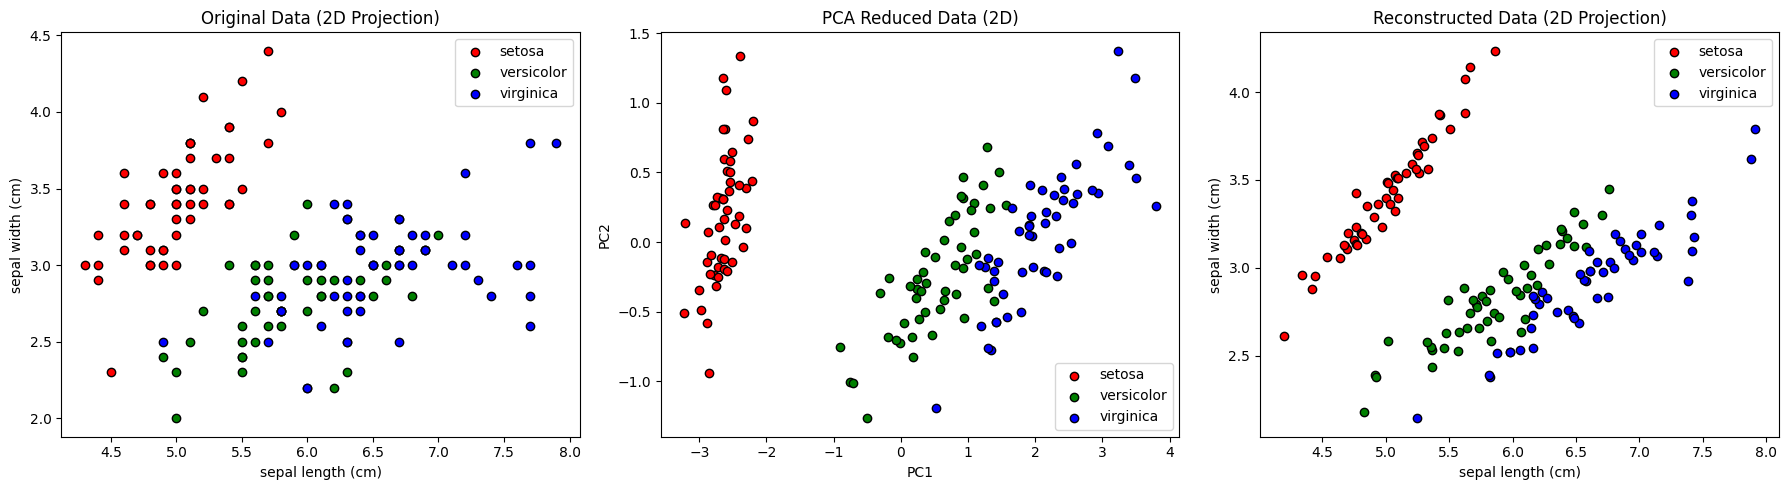

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Load Iris dataset
iris = load_iris()
X = iris.data  # original 4D data
y = iris.target  # class labels
feature_names = iris.feature_names

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Reconstruct the 4D data from the 2D representation
X_reconstructed = pca.inverse_transform(X_reduced)

# Calculate reconstruction error (MSE)
reconstruction_error = mean_squared_error(X, X_reconstructed)
print("Reconstruction error (MSE):", reconstruction_error)

# Plot settings
colors = ['red', 'green', 'blue']
labels = iris.target_names

# 1. Original data projected onto first 2 features
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=label, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Original Data (2D Projection)")
plt.legend()

# 2. PCA-reduced 2D data
plt.subplot(1,3,2)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X_reduced[y==i, 0], X_reduced[y==i, 1], color=color, label=label, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Reduced Data (2D)")
plt.legend()

# 3. Reconstructed data projected onto first 2 features
plt.subplot(1,3,3)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X_reconstructed[y==i, 0], X_reconstructed[y==i, 1], color=color, label=label, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Reconstructed Data (2D Projection)")
plt.legend()

plt.tight_layout()
plt.show()


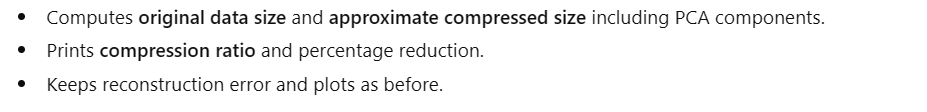

Original size: 4800 bytes
Compressed size (PCA + components): 2464 bytes
Compression ratio: 0.513 (48.7% reduction)
Reconstruction error (MSE): 0.025341073932398255


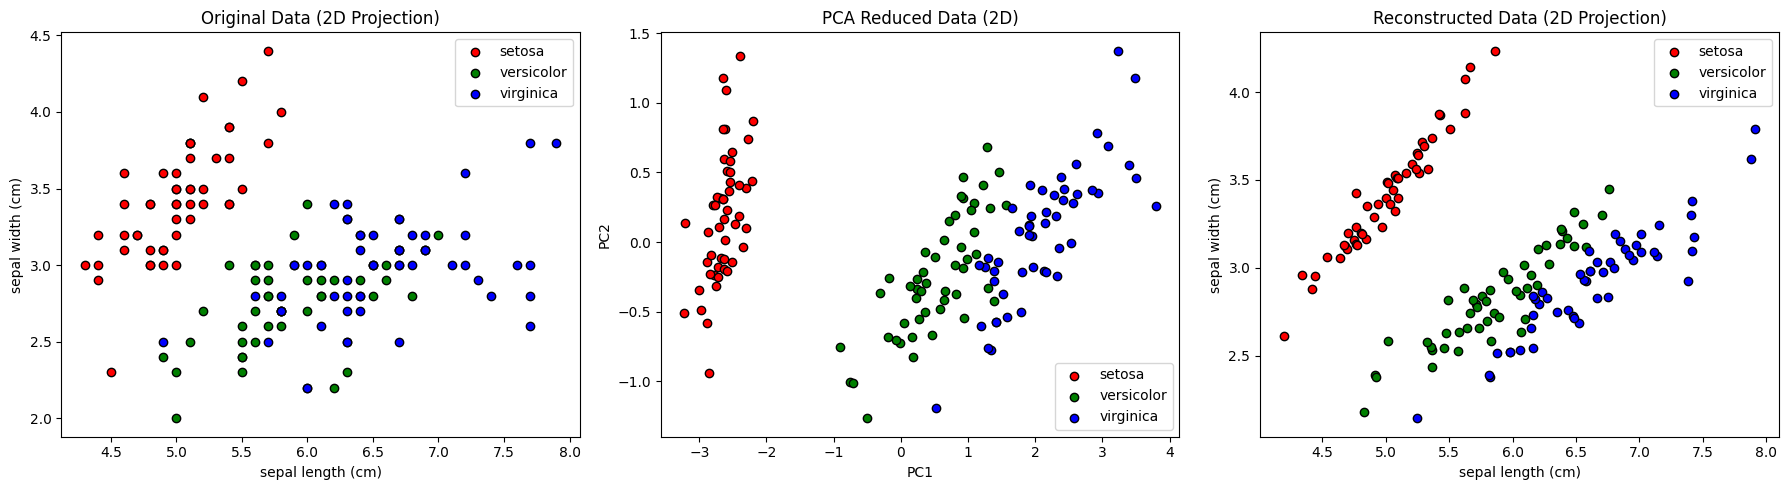

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Load Iris dataset
iris = load_iris()
X = iris.data  # original 4D data
y = iris.target  # class labels
feature_names = iris.feature_names

# Original data size (in bytes)
original_size = X.nbytes

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Compressed data size (approximation: reduced data + PCA components)
# X_reduced + PCA components (2x4) = 150x2 + 2x4
compressed_size = X_reduced.nbytes + pca.components_.nbytes

# Compression ratio
compression_ratio = compressed_size / original_size
print(f"Original size: {original_size} bytes")
print(f"Compressed size (PCA + components): {compressed_size} bytes")
print(f"Compression ratio: {compression_ratio:.3f} ({100*(1-compression_ratio):.1f}% reduction)")

# Reconstruct the 4D data from the 2D representation
X_reconstructed = pca.inverse_transform(X_reduced)

# Calculate reconstruction error (MSE)
reconstruction_error = mean_squared_error(X, X_reconstructed)
print("Reconstruction error (MSE):", reconstruction_error)

# Plot settings
colors = ['red', 'green', 'blue']
labels = iris.target_names

# 1. Original data projected onto first 2 features
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=label, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Original Data (2D Projection)")
plt.legend()

# 2. PCA-reduced 2D data
plt.subplot(1,3,2)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X_reduced[y==i, 0], X_reduced[y==i, 1], color=color, label=label, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Reduced Data (2D)")
plt.legend()

# 3. Reconstructed data projected onto first 2 features
plt.subplot(1,3,3)
for i, color, label in zip([0,1,2], colors, labels):
    plt.scatter(X_reconstructed[y==i, 0], X_reconstructed[y==i, 1], color=color, label=label, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Reconstructed Data (2D Projection)")
plt.legend()

plt.tight_layout()
plt.show()


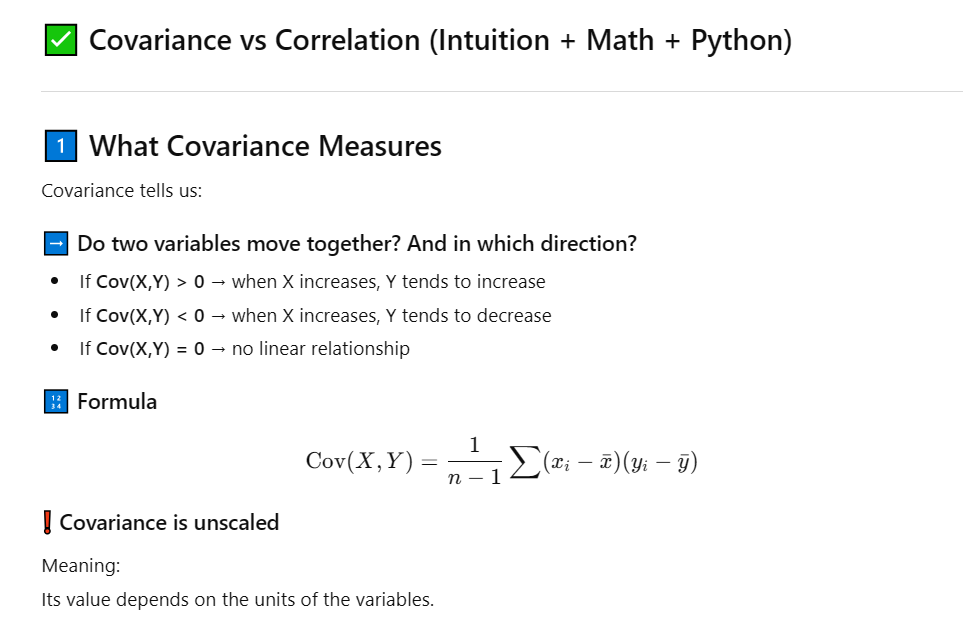

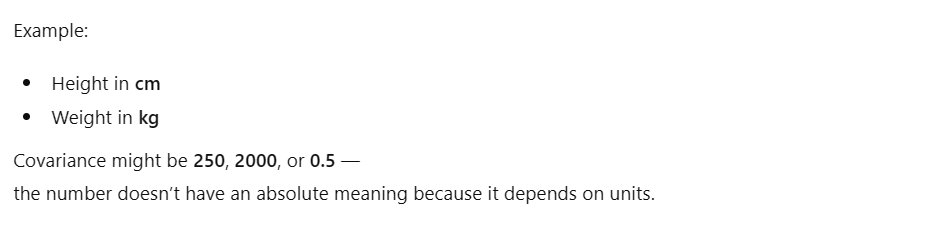

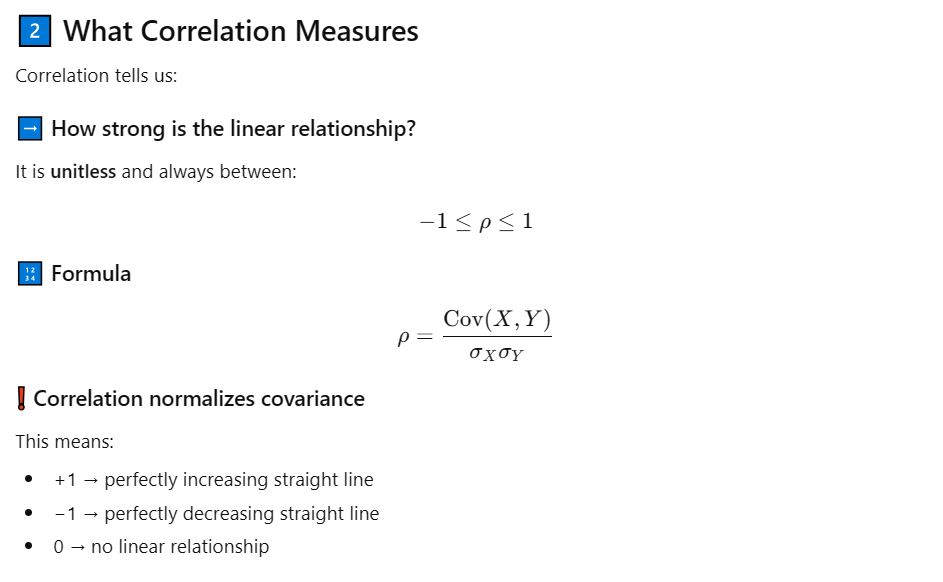

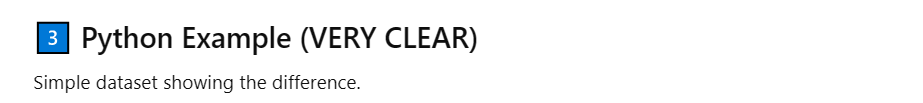

In [19]:
import numpy as np

# Example synthetic data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 6, 8, 10])   # perfectly correlated with X

# Compute covariance matrix
cov_matrix = np.cov(X, Y)
cov_xy = cov_matrix[0,1]

# Compute correlation matrix
corr_matrix = np.corrcoef(X, Y)
corr_xy = corr_matrix[0,1]

print("Covariance (X,Y):", cov_xy)
print("Correlation (X,Y):", corr_xy)


Covariance (X,Y): 5.0
Correlation (X,Y): 0.9999999999999999


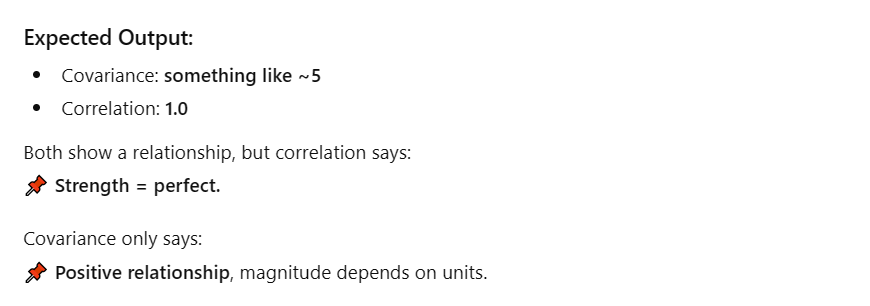

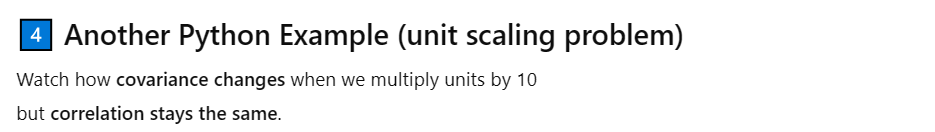

In [20]:
X2 = X * 10   # change units artificially (example: cm → mm)

cov2 = np.cov(X2, Y)[0,1]
corr2 = np.corrcoef(X2, Y)[0,1]

print("Scaled Covariance:", cov2)
print("Scaled Correlation:", corr2)

Scaled Covariance: 50.0
Scaled Correlation: 1.0


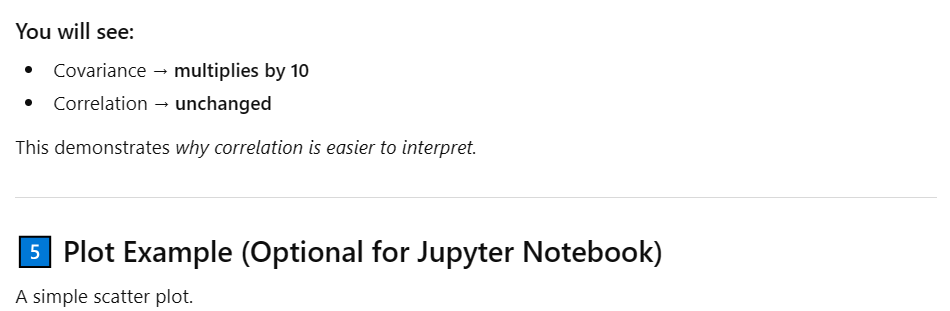

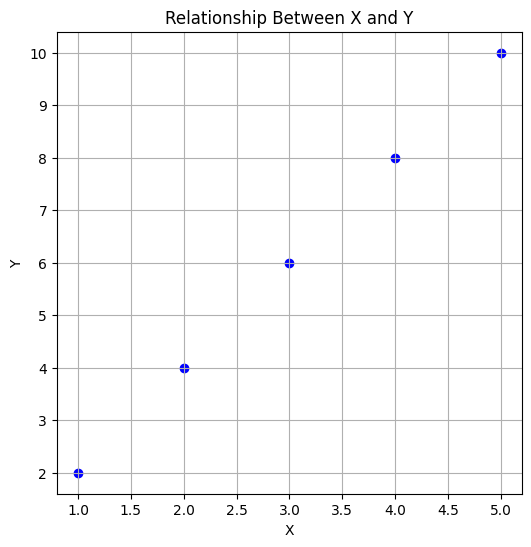

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X, Y, color='blue')
plt.title("Relationship Between X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


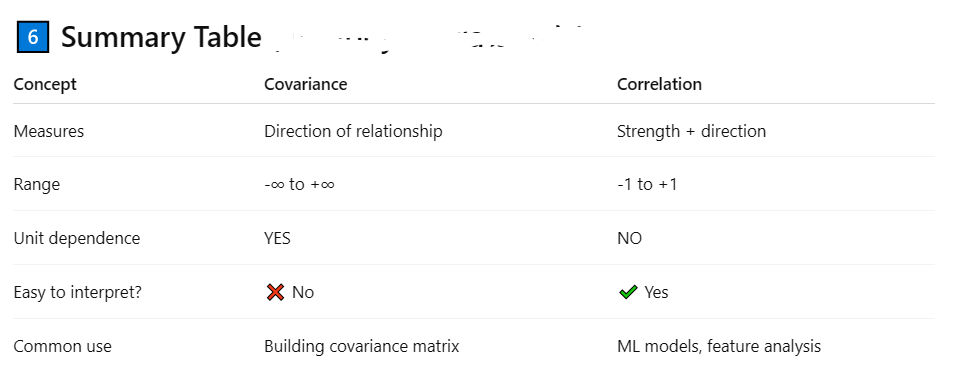

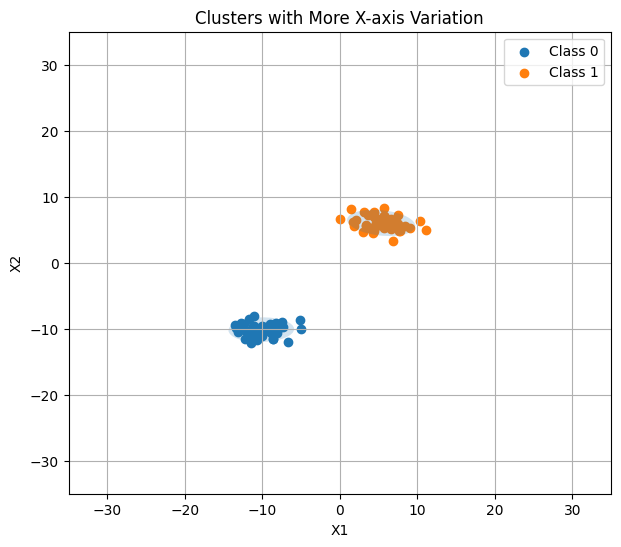

In [22]:
# 5️⃣ More variation on x-axis only
# Manually adjust covariance
X_custom = np.vstack([
    np.random.multivariate_normal([-10,-10], [[5,0],[0,1]], 50),
    np.random.multivariate_normal([6,6], [[5,0],[0,1]], 50)
])
y_custom = np.array([0]*50 + [1]*50)

plot_cluster_ellipse(X_custom, y_custom, title="Clusters with More X-axis Variation")

# print(X_custom)